# Sv Histograms for Intensity-Based Section

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

years = [2007,2008,2009,2010,2011,2013,2014,2015,2016] #,2017,2018
year_codes = [2007205,2008205,2009107,2010205,2011206,2013842,2014807,2015837,2016837] #,2017843,2018823
patch_size = 8

for y in tqdm(range(len(years)), desc="Loading Data"):
    var_name = f'patch_data_array_all_{years[y]}'
    globals()[var_name] = np.load(f'/scratch/disk5/ahmet/data/{years[y]}/{year_codes[y]}/'
                                  f'ACOUSTIC/GRIDDED/{year_codes[y]}_patch_data_array_all_{patch_size}w.npy',
                                  allow_pickle=True)
    indices_to_remove = np.where(globals()[var_name]['label'] == 'ignore')[0]
    globals()[var_name] = np.delete(globals()[var_name], indices_to_remove, axis=0)
    globals()[var_name]['total_elements'] = years[y] # Total elements colonuna yil yazdim


Loading Data: 100%|██████████| 9/9 [04:13<00:00, 28.14s/it]


In [2]:

data_arrays = []

for y in range(len(years)):
    var_name = f'patch_data_array_all_{years[y]}'
    data_arrays.append(globals()[var_name])

concatenated_data = np.concatenate(data_arrays, axis=0)

In [3]:
len(concatenated_data)

90250960

In [ ]:
# FINAL FIGURE

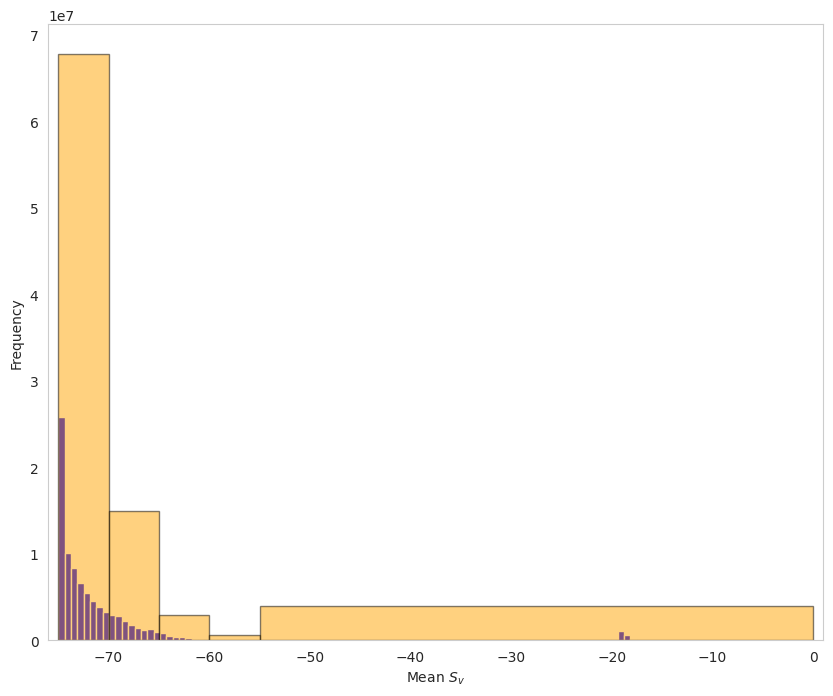

In [10]:
# Visualization: Equal bins (200)
plt.rcParams["axes.grid"] = False
plt.figure(figsize=(10,8))
plt.hist(concatenated_data['Sv_all_mean'], bins=101, color='blue', alpha=1, density=False)


plt.hist(concatenated_data['Sv_all_mean'], bins=[-75, -70, -65, -60, -55, 0], color='orange', alpha=0.50, edgecolor='black', density=False)
plt.xlabel('Mean $S_v$')
plt.ylabel('Frequency')
plt.xlim(-76, 1)
plt.savefig('Sv_mean_all_data_custom_bins_combined', dpi=600)
plt.show()

In [5]:

data = np.load('/scratch/disk5/ahmet/data/8w_Sampled_Data_9Years/Intensity_Based2/data_8w_IntensityBased2FIXED_16Batch_200Ep_100Iter_320000_FIXED.npy')
patch_class = np.load('/scratch/disk5/ahmet/data/8w_Sampled_Data_9Years/Intensity_Based2/patch_class_8w_IntensityBased2_16Batch_200Ep_100Iter_320000.npy')
years = np.load('/scratch/disk5/ahmet/data/8w_Sampled_Data_9Years/Intensity_Based2/years_8w_IntensityBased2_16Batch_200Ep_100Iter_320000.npy')
center_coordinates = np.load('/scratch/disk5/ahmet/data/8w_Sampled_Data_9Years/Intensity_Based2/center_coordinates_8w_IntensityBased2_16Batch_200Ep_100Iter_320000.npy')



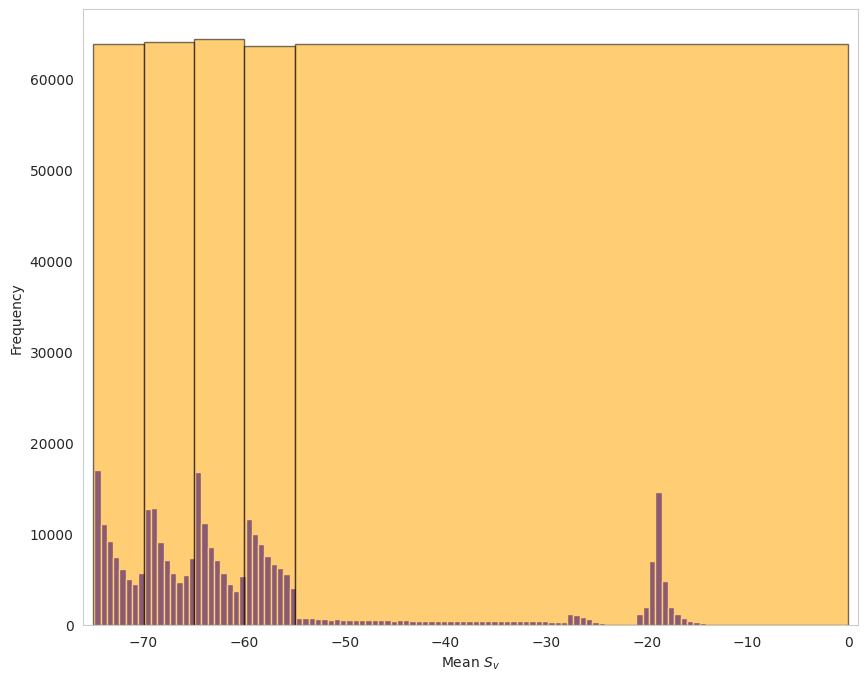

In [9]:

average_values = np.mean(data, axis=(1, 2, 3))
plt.rcParams["axes.grid"] = False

plt.figure(figsize=(10,8))

plt.hist(average_values, bins=101, color='blue', alpha=1)
plt.hist(average_values, bins=[-75, -70, -65, -60, -55, 0], color='orange', alpha=0.55, edgecolor='black')

plt.xlabel('Mean $S_v$')
plt.ylabel('Frequency')
plt.xlim(-76, 1)
plt.savefig('Sv_mean_smpled_data_custom_bins_combined', dpi=600)
plt.show()

In [4]:
#year_based = concatenated_data[concatenated_data['total_elements']==2007]

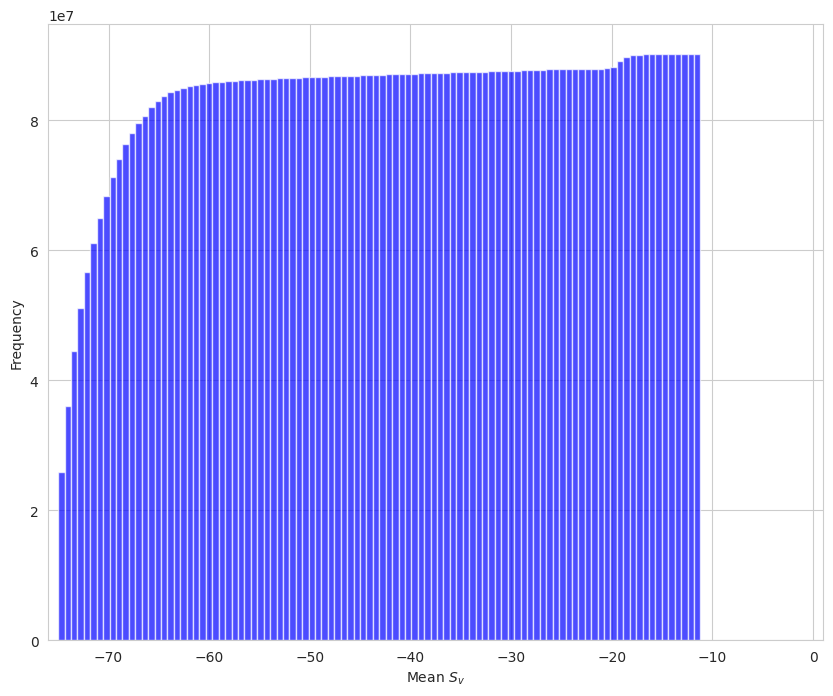

In [8]:

plt.figure(figsize=(10,8))
plt.hist(concatenated_data['Sv_all_mean'], bins=100, color='blue', alpha=0.7, cumulative=True)
plt.xlabel('Mean $S_v$')
plt.ylabel('Frequency')
plt.xlim(-76, 1)
#plt.ylim(0, 1000000)
#plt.savefig('Sv_mean_all_data_equal_bins', dpi=600)
plt.show()

In [28]:
# Clean the data by removing NaN values
clean_data = concatenated_data['Sv_all_mean'][~np.isnan(concatenated_data['Sv_all_mean'])]

bin_edges = np.quantile(clean_data, np.linspace(0.20, 0.99, 5))
bin_edges

array([-74.72161583, -73.73992911, -72.16794618, -69.20090471,
       -18.70712364])

In [9]:
# Clean the data by removing NaN values
clean_data = concatenated_data['Sv_all_mean'][~np.isnan(concatenated_data['Sv_all_mean'])]

bin_edges = np.quantile(clean_data, np.linspace(0.12, 0.99, 5))
bin_edges

array([-74.94433597, -74.10012005, -72.5542288 , -69.60135641,
       -18.70712364])

In [7]:

bin_edges = np.quantile(clean_data[clean_data<-39.5], np.linspace(0.1, 0.99, 5))
bin_edges


NameError: name 'clean_data' is not defined

In [6]:
plt.figure(figsize=(10, 8))

plt.hist(concatenated_data['Sv_all_mean'], bins=bin_edges, color='blue', alpha=0.7)

plt.xlabel('Mean $S_v$')
plt.ylabel('Frequency')
plt.xlim(-76, 1)
plt.show()

NameError: name 'bin_edges' is not defined

<Figure size 1000x800 with 0 Axes>

ValueError: 60 option for line not understood

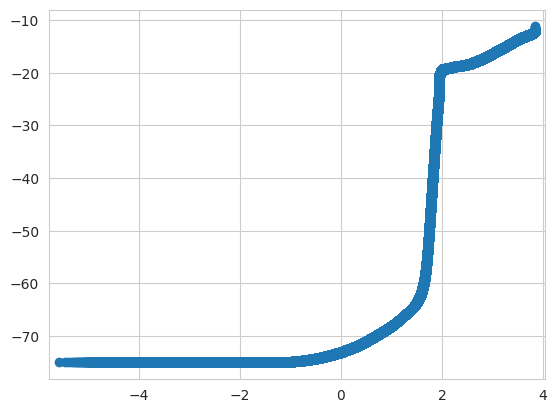

In [39]:
import statsmodels.api as sm

fig = sm.qqplot(concatenated_data['Sv_all_mean'], line='60')
plt.show()

In [22]:
borders_95_without_tail = np.linspace(-74.9765, np.quantile(clean_data, 0.99),6)
borders_95_without_tail

array([-74.9765    , -63.72262473, -52.46874946, -41.21487418,
       -29.96099891, -18.70712364])

In [23]:
bin_edges = borders_95_without_tail

samples_per_bin = 320000 // 5

sampled_indices = []

for i in range(len(bin_edges) - 1):
    bin_indices = np.where((concatenated_data['Sv_all_mean'] >= bin_edges[i]) &
                           (concatenated_data['Sv_all_mean'] < bin_edges[i + 1]))[0]

    if len(bin_indices) >= samples_per_bin:
        sampled_bin_indices = np.random.choice(bin_indices, size=samples_per_bin, replace=False)
    else:
        print(f"Not enough samples in bin {i}, needed {samples_per_bin}, but only have {len(bin_indices)}.")
        sampled_bin_indices = bin_indices 

    sampled_indices.extend(sampled_bin_indices)

sampled_data = concatenated_data[sampled_indices]

print(f"Sampled data contains {len(sampled_data)} instances.")

Sampled data contains 320000 instances.


In [36]:
np.save('/scratch/disk5/ahmet/data/8w_Sampled_Data_9Years/Intensity_Based3/detailed_8w_IntensityBased3_16Batch_200Ep_100Iter_320000.npy', sampled_data)

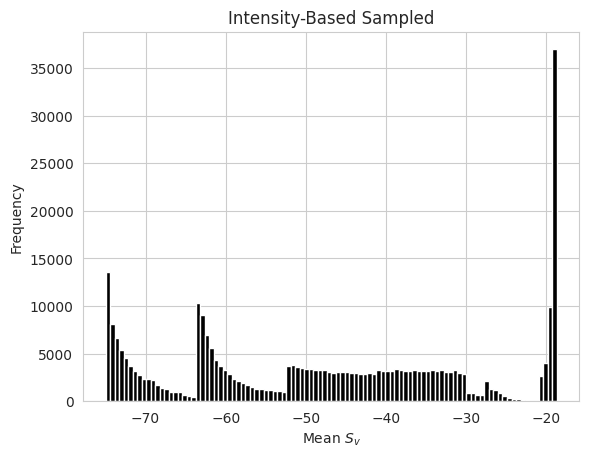

In [24]:
plt.hist(sampled_data['Sv_all_mean'], bins=100, color='black', cumulative=False)
plt.title('Intensity-Based Sampled')
plt.xlabel('Mean $S_v$')
plt.ylabel('Frequency')
#plt.xlim(-76, 1)


plt.show()


In [30]:
np.quantile(sampled_data['Sv_all_mean'], np.linspace(0.1, 0.99, 5))

array([-72.91486872, -60.49512514, -44.58932926, -31.88958102,
       -18.75146423])

In [29]:
sampled_data

array([(1707764, 124, 'background', 0, 0, 0, -74.97405912, 2009),
       (1352668, 132, 'background', 0, 0, 0, -65.60843149, 2008),
       ( 591988, 220, 'background', 0, 0, 0, -74.52471089, 2010), ...,
       ( 287060,   4, 'background', 0, 0, 0, -18.75414662, 2016),
       (1035924,   4, 'background', 0, 0, 0, -25.65972051, 2007),
       ( 767844,   4, 'background', 0, 0, 0, -19.23347855, 2014)],
      dtype=[('center_x', '<i8'), ('center_y', '<i8'), ('label', '<U20'), ('count_1', '<i8'), ('count_2', '<i8'), ('count_3', '<i8'), ('Sv_all_mean', '<f8'), ('total_elements', '<i8')])

In [54]:
sampled_data[sampled_data['total_elements']==2016]

array([(2862476, 516, 'background', 0, 0,  0, -74.35553856, 2016),
       (2355108, 236, 'background', 0, 0,  0, -72.14441723, 2016),
       ( 180436,  20, 'background', 0, 0,  0, -72.72748246, 2016), ...,
       ( 287932, 308, 'seabed', 0, 0, 15, -62.46555338, 2016),
       (2202340, 308, 'seabed', 0, 0, 20, -60.742428  , 2016),
       (1934020,  60, 'background', 0, 0,  0, -60.82810864, 2016)],
      dtype=[('center_x', '<i8'), ('center_y', '<i8'), ('label', '<U20'), ('count_1', '<i8'), ('count_2', '<i8'), ('count_3', '<i8'), ('Sv_all_mean', '<f8'), ('total_elements', '<i8')])

In [46]:
np.load('/scratch/disk5/ahmet/data/8w_Sampled_Data_9Years/Intensity_Based3/data_8w_IntensityBased3_16Batch_200Ep_100Iter_320000.npy').shape

(27, 4, 8, 8)

In [3]:
np.load('/scratch/disk5/ahmet/data/8w_Sampled_Data_9Years/YENI_Intensity_Based/data_8w_IntensityBased_16Batch_200Ep_100Iter_320000.npy').shape

(320000, 4, 8, 8)

In [4]:
# Visualization: Custom Bins
plt.figure(figsize=(10,8))
# Plot histogram of the average values with border lines for each bin
plt.hist(concatenated_data['Sv_all_mean'], bins=[-75, -70, -65, -60, -55, 0], color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Mean $S_v$')
plt.ylabel('Frequency')
plt.xlim(-76, 1)
plt.savefig('Sv_mean_all_data_custom_bins', dpi=600)
plt.show()


NameError: name 'concatenated_data' is not defined

<Figure size 1000x800 with 0 Axes>

In [5]:

data = np.load('/scratch/disk5/ahmet/data/8w_Sampled_Data_9Years/YENI_Intensity_Based/data_8w_IntensityBased_16Batch_200Ep_100Iter_320000.npy')
patch_class = np.load('/scratch/disk5/ahmet/data/8w_Sampled_Data_9Years/Intensity_Based2/patch_class_8w_IntensityBased2_16Batch_200Ep_100Iter_320000.npy')
years = np.load('/scratch/disk5/ahmet/data/8w_Sampled_Data_9Years/Intensity_Based2/years_8w_IntensityBased2_16Batch_200Ep_100Iter_320000.npy')
center_coordinates = np.load('/scratch/disk5/ahmet/data/8w_Sampled_Data_9Years/Intensity_Based2/center_coordinates_8w_IntensityBased2_16Batch_200Ep_100Iter_320000.npy')

In [6]:
sampled_data[:4]

NameError: name 'sampled_data' is not defined

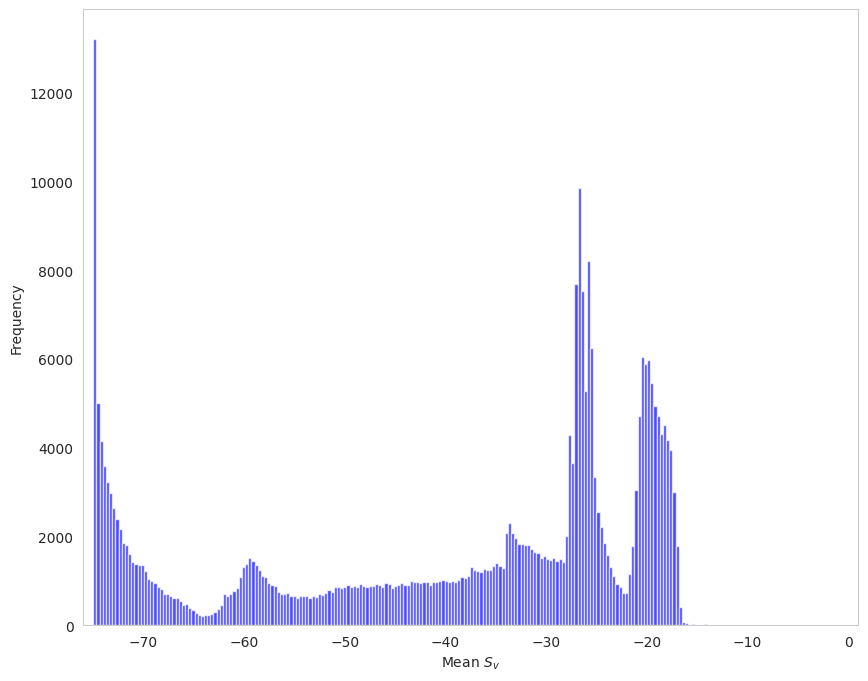

In [7]:

average_values = np.mean(data, axis=(1, 2, 3))
plt.rcParams["axes.grid"] = False

plt.figure(figsize=(10,8))
# Plot histogram of the average values
plt.hist(average_values, bins=200, color='blue', alpha=0.7)
plt.xlabel('Mean $S_v$')
plt.ylabel('Frequency')
plt.xlim(-76, 1)
plt.savefig('Sv_mean_sampled_data_equal_bins', dpi=600)
plt.show()

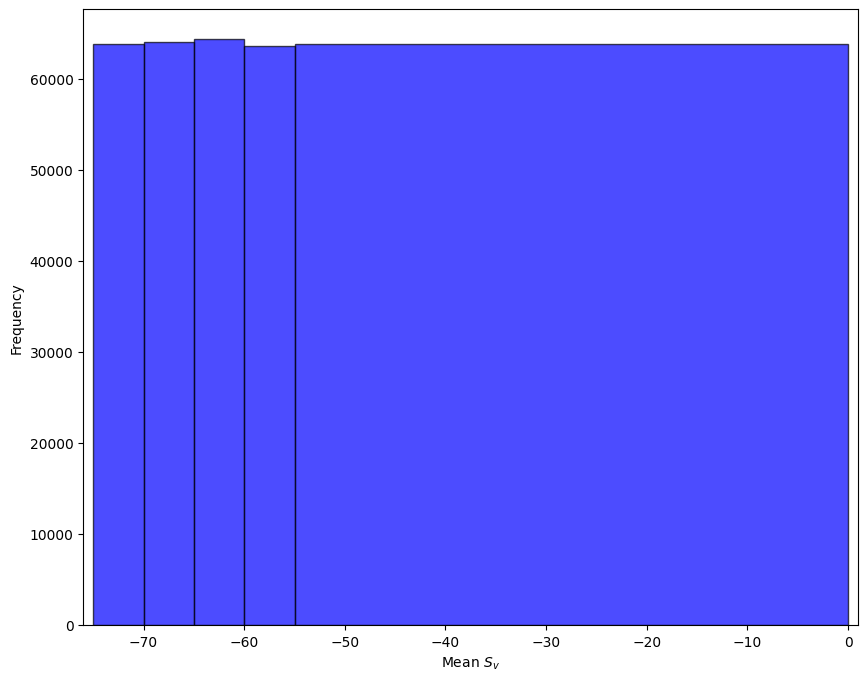

In [48]:
# Custom bins
plt.figure(figsize=(10,8))
plt.hist(average_values, bins=[-75, -70, -65, -60, -55, 0], color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Mean $S_v$')
plt.ylabel('Frequency')
plt.xlim(-76, 1)
plt.savefig('Sv_mean_smpled_data_custom_bins', dpi=600)
plt.show()

In [31]:
data_random = np.load('/scratch/disk5/ahmet/data/8w_Sampled_Data_9Years/Random/data_8w_RANDOM_16Batch_200Ep_100Iter_320000.npy')

In [37]:
np.quantile(data_random.mean(axis=(1,2,3)),np.linspace(0.1, 0.99, 5))

array([-74.98015198, -74.27865913, -72.86583845, -70.14376957,
       -41.65713799])

In [34]:
data_random['Sv_all_mean']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [35]:
data_random

array([[[[-75.        , -75.        , -75.        , ..., -75.        ,
          -75.        , -75.        ],
         [-75.        , -75.        , -75.        , ..., -75.        ,
          -75.        , -75.        ],
         [-75.        , -75.        , -75.        , ..., -75.        ,
          -75.        , -75.        ],
         ...,
         [-75.        , -75.        , -75.        , ..., -75.        ,
          -75.        , -75.        ],
         [-75.        , -75.        , -75.        , ..., -75.        ,
          -75.        , -75.        ],
         [-75.        , -75.        , -75.        , ..., -75.        ,
          -75.        , -75.        ]],

        [[-75.        , -75.        , -75.        , ..., -75.        ,
          -75.        , -75.        ],
         [-75.        , -75.        , -75.        , ..., -75.        ,
          -75.        , -75.        ],
         [-75.        , -75.        , -75.        , ..., -75.        ,
          -75.        , -75.     